In [ ]:
%cd ../

%config InlineBackend.figure_format="svg"

/home/marco/contrast-gan-3D


In [ ]:
from contrast_gan_3D import config

config.CADRADS_DATASET.resolve()

PosixPath('/home/roel/data/IDR_CADRADS/image')

In [ ]:
cadrads_img_path = config.CADRADS_DATASET / "image3095" / "3095.mhd"
cadrads_img_path.is_file()

True

In [ ]:
cadrads_img_h5_path = cadrads_img_path.with_suffix(".h5")
cadrads_img_h5_path.is_file()

True

In [ ]:
from contrast_gan_3D.utils import io_utils

cadrads_img_h5, cadrads_meta_h5 = io_utils.load_h5_image(cadrads_img_h5_path)
print(cadrads_img_h5.shape)
cadrads_meta_h5

(512, 512, 303)


{'spacing': array([0.31054688, 0.31054688, 0.4       ]),
 'offset': array([ -55.34472656, -235.34472656, 1120.7       ]),
 'centerlines': array([[ 3.7472195e+01, -1.4740981e+02,  1.2139510e+03,  5.2000000e+01],
        [ 3.6408020e+01, -1.4751817e+02,  1.2153896e+03,  5.1000000e+01],
        [ 3.6233765e+01, -1.4755484e+02,  1.2155544e+03,  5.0000000e+01],
        [ 3.5031414e+01, -1.4858612e+02,  1.2164296e+03,  4.9000000e+01],
        [ 3.4243580e+01, -1.4877257e+02,  1.2170081e+03,  4.8000000e+01],
        [ 3.3390568e+01, -1.4918289e+02,  1.2173286e+03,  4.7000000e+01],
        [ 3.2660427e+01, -1.4934412e+02,  1.2179722e+03,  4.6000000e+01],
        [ 3.1999208e+01, -1.4930865e+02,  1.2187206e+03,  4.5000000e+01],
        [ 3.1172539e+01, -1.4944843e+02,  1.2192371e+03,  4.4000000e+01],
        [ 3.0283260e+01, -1.4987169e+02,  1.2194065e+03,  4.3000000e+01],
        [ 2.9508919e+01, -1.4992462e+02,  1.2199945e+03,  4.2000000e+01],
        [ 2.8772221e+01, -1.4991472e+02,  1.22065

In [ ]:
# cadrads_img, cadrads_meta = io_utils.load_sitk_image(cadrads_img_path)
# print(cadrads_img.shape)
# cadrads_meta

In [ ]:
from matplotlib import pyplot as plt

from monai.visualize import matshow3d

# fig, ax = plt.subplots(figsize=(15, 10))
# matshow3d(cadrads_img, fig=ax, every_n=20, cmap="gray");

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
matshow3d(cadrads_img_h5, fig=ax, every_n=20, cmap="gray")

In [ ]:
from contrast_gan_3D.utils import geometry

cadrads_ctls_world = cadrads_meta_h5["centerlines"]
print(cadrads_ctls_world.shape)
cadrads_ctls_image = geometry.world_to_image_coords(
    cadrads_ctls_world[:, :3], cadrads_meta_h5["offset"], cadrads_meta_h5["spacing"]
)
cadrads_ctls_image[:10]

(78, 4)


array([[299, 283, 233],
       [295, 283, 237],
       [295, 283, 237],
       [291, 279, 239],
       [288, 279, 241],
       [286, 277, 242],
       [283, 277, 243],
       [281, 277, 245],
       [279, 277, 246],
       [276, 275, 247]])

In [ ]:
import numpy as np

rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7FC16FE30E40

In [ ]:
n_ctls_samples = len(cadrads_ctls_image)
# n_ctls_samples = 27
chosen_ctls = np.sort(rng.choice(cadrads_ctls_image, n_ctls_samples), axis=0)
chosen_ctls[:10]

array([[176, 141, 210],
       [177, 144, 210],
       [177, 144, 211],
       [177, 144, 211],
       [180, 145, 212],
       [180, 145, 213],
       [185, 147, 214],
       [185, 147, 214],
       [188, 148, 214],
       [189, 150, 216]])

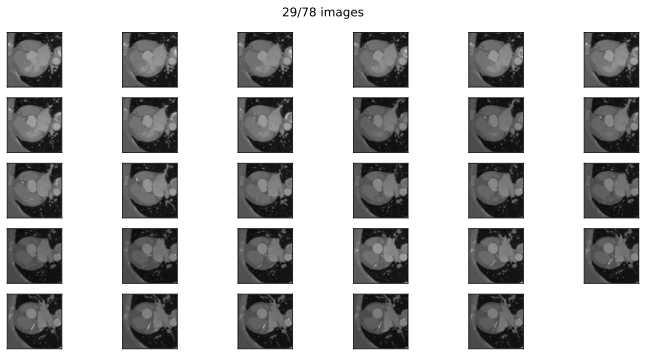

In [ ]:
from contrast_gan_3D.utils.visualization import (
    plot_axial_slices,
    plot_axial_centerlines,
)

x = cadrads_img_h5[..., np.unique(chosen_ctls[..., 2])]
plot_axial_slices(x, title=f"{x.shape[-1]}/{len(chosen_ctls)} images", figsize=(10, 5))

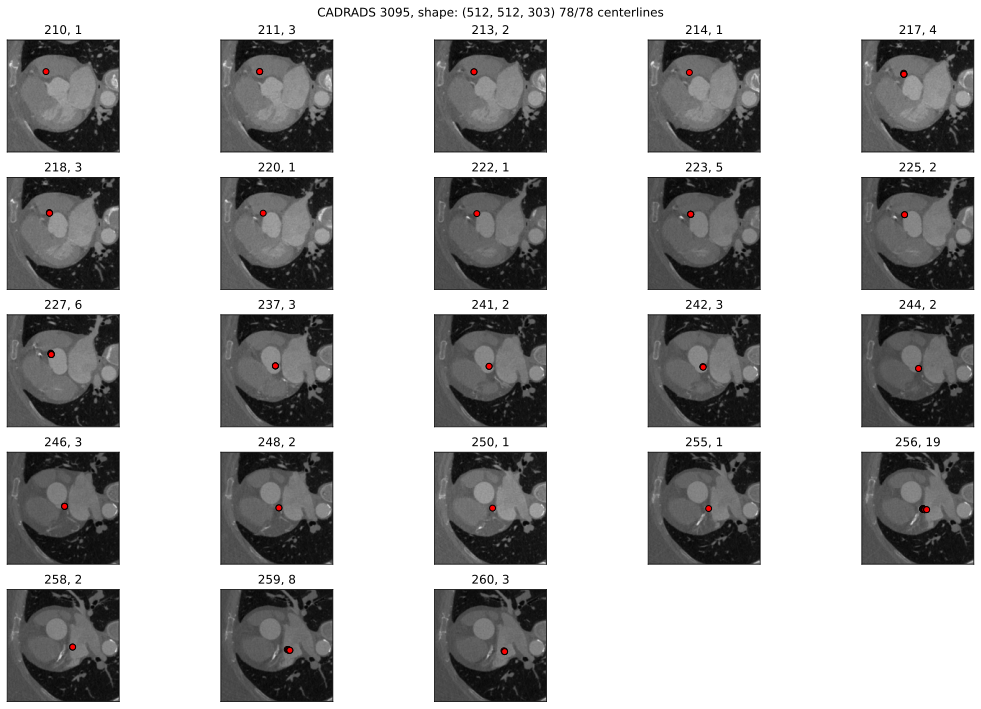

In [ ]:
plot_axial_centerlines(
    cadrads_img_h5,
    chosen_ctls,
    rng=rng,
    title=f"CADRADS 3095, shape: {cadrads_img_h5.shape}",
    figsize=(15, 10),
)

In [ ]:
asoca_010_img, asoca_010_meta = io_utils.load_sitk_image(
    config.ASOCA_DATASET / "ASOCA-010.mhd"
)
print(asoca_010_img.shape)
asoca_010_meta

(512, 512, 212)


{'spacing': array([0.30664101, 0.30664101, 0.625     ]),
 'offset': array([  60.40000153,   96.09999847, -219.875     ])}

In [ ]:
from contrast_gan_3D.utils import io_utils

centerlines_ASOCA_10 = io_utils.load_centerlines(
    "/home/marco/cnn_centerline_autotrack_AllInOneNils/test_out/ASOCA-010"
)
centerlines_ASOCA_10.shape

Saved centerlines to /home/marco/cnn_centerline_autotrack_AllInOneNils/test_out/ASOCA-010/centerlines.txt with key 'centerlines'


(11908, 4)

In [ ]:
asoca_010_ctls_img = geometry.world_to_image_coords(
    centerlines_ASOCA_10[..., :3], asoca_010_meta["offset"], asoca_010_meta["spacing"]
)
print(asoca_010_ctls_img.shape)
asoca_010_ctls_img[:10]

(11908, 3)


array([[243, 235, 163],
       [242, 235, 163],
       [241, 235, 163],
       [240, 234, 163],
       [240, 234, 163],
       [239, 234, 164],
       [238, 233, 164],
       [238, 233, 164],
       [237, 232, 164],
       [237, 232, 164]])

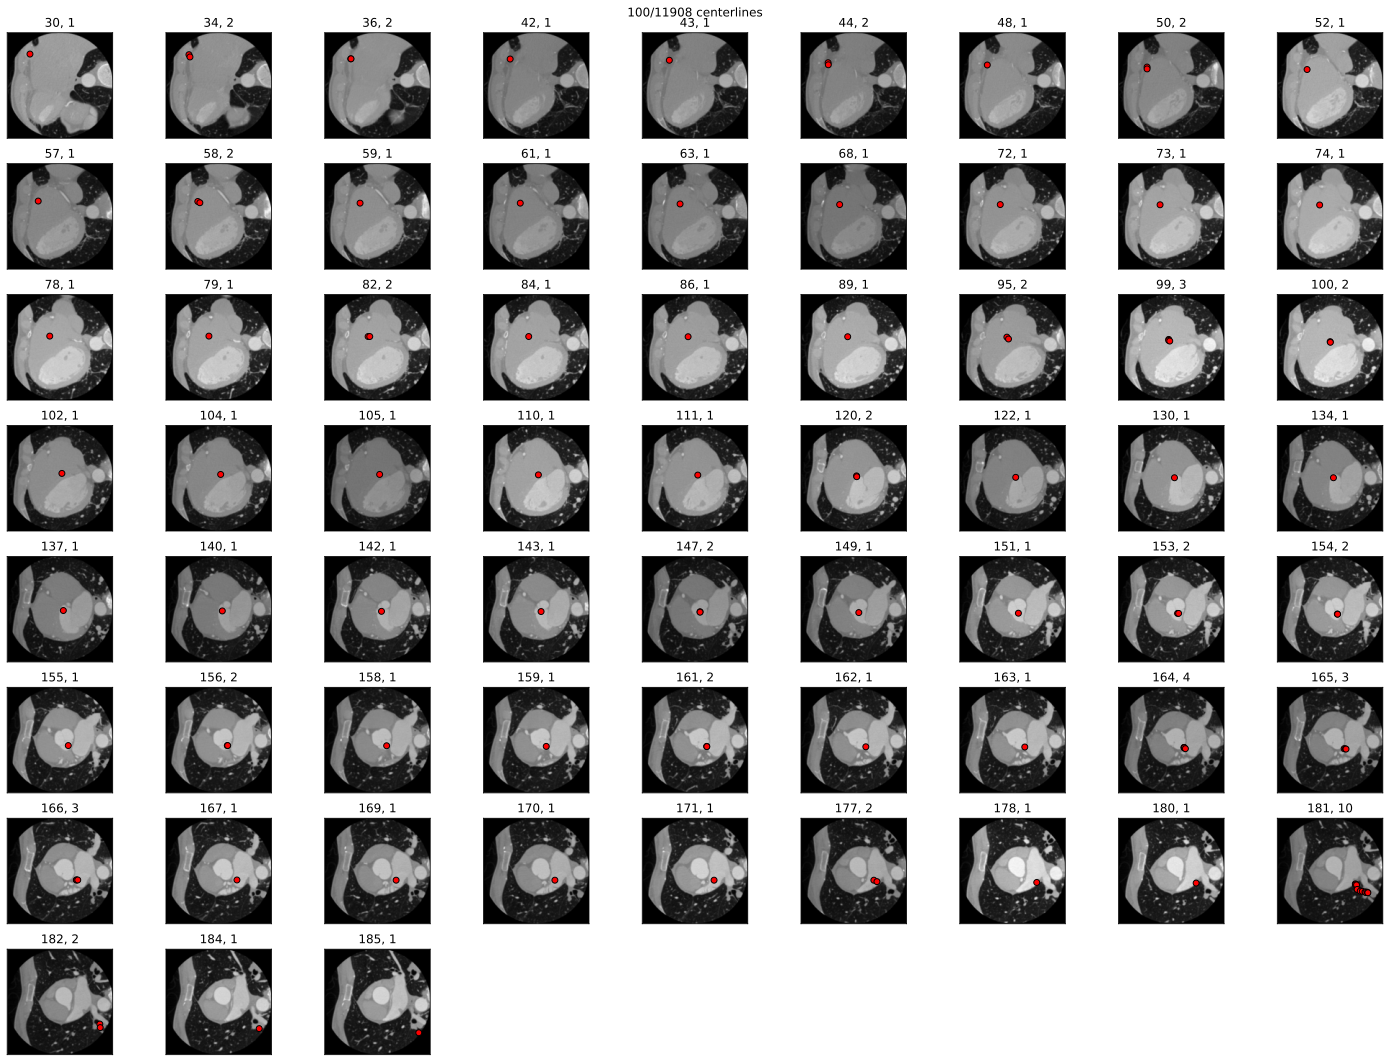

In [ ]:
from contrast_gan_3D.utils import visualization

visualization.plot_axial_centerlines(asoca_010_img, asoca_010_ctls_img, rng=rng, n=100)

In [ ]:
asoca_010_ctls_img_annot = io_utils.load_ASOCA_annotated_centerlines(
    config.ASOCA_DATASET.parent / "centerlines" / "ASOCA-010.ctl.anno"
)
asoca_010_ctls_img_annot = geometry.world_to_image_coords(
    asoca_010_ctls_img_annot, asoca_010_meta["offset"], asoca_010_meta["spacing"]
)
asoca_010_ctls_img_annot.shape

(2505, 3)

In [ ]:
visualization.plot_axial_centerlines(
    asoca_010_img,
    asoca_010_ctls_img_annot,
    n=100,
    rng=rng,
    title="ASOCA-010 centerlines annotation",
)

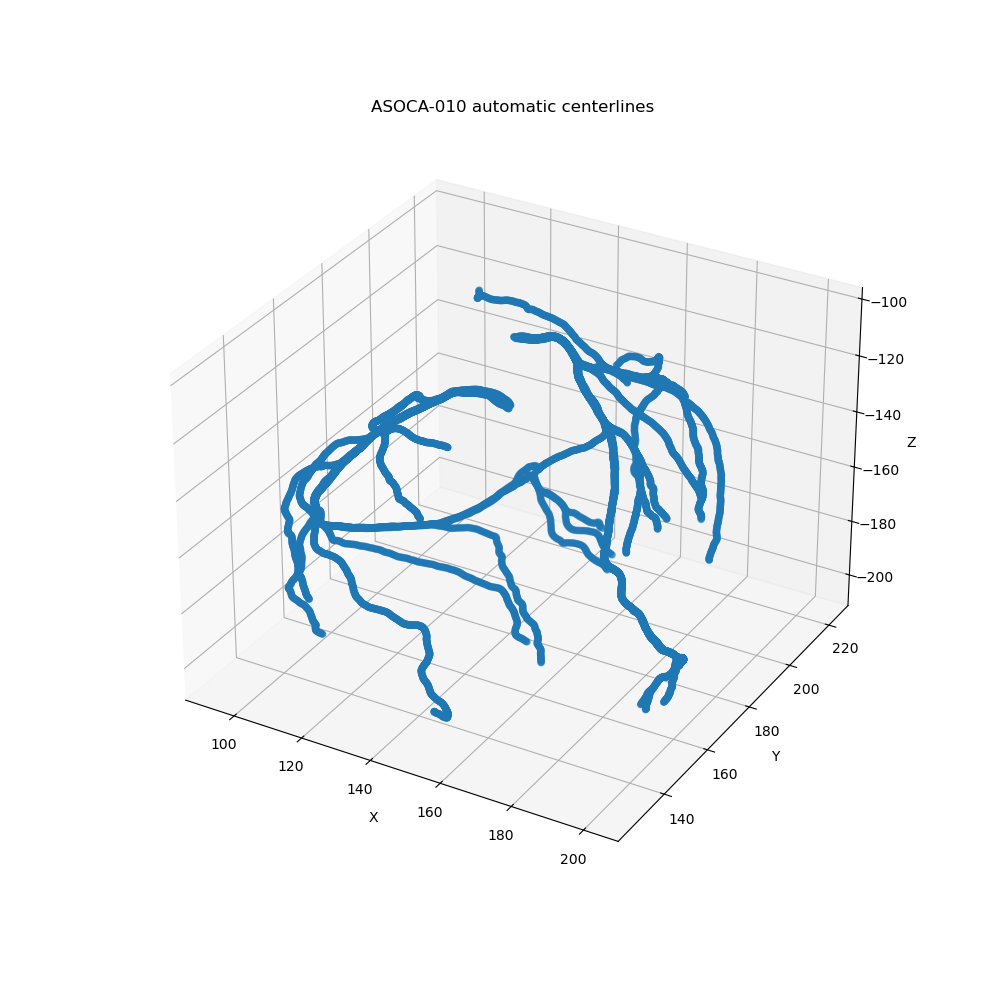

In [ ]:
%matplotlib widget

visualization.plot_centerlines_3D(
    centerlines_ASOCA_10[..., :3], "ASOCA-010 automatic centerlines"
)

In [ ]:
mmhws_img, mmhws_meta = io_utils.load_sitk_image(
    config.MMWHS_DATASET / "ct_train" / "ct_train_1001_image.nii.gz"
)
print(mmhws_img.shape)
mmhws_meta

(512, 512, 363)


{'spacing': array([0.35546875, 0.35546875, 0.44999999]),
 'offset': array([ -45.5       ,  228.58453369, -271.88000488])}